# Notebook 5: Tree-Based Models

## Objectives
By the end of this notebook, you will be able to:
1.  **Understand Decision Trees**: Learn how trees make decisions using splits and impurity.
2.  **Implement Decision Trees**: Use `scikit-learn` to build and visualize a decision tree.
3.  **Understand Ensemble Methods**: Learn how Bagging and Random Forests improve upon single trees.
4.  **Implement Random Forests**: Build robust models using `RandomForestClassifier`.
5.  **Apply Best Practices**: Use hyperparameter tuning to optimize model performance.

## Prerequisites
-   Notebook 4 (Classification)
-   Basic understanding of overfitting vs underfitting.


## Part 1: Decision Trees

### Concept
A Decision Tree asks a series of yes/no questions to split the data into groups that are as "pure" as possible (containing mostly one class).

### Key Terms
-   **Root Node**: The starting point of the tree.
-   **Leaf Node**: The final decision/prediction.
-   **Gini Impurity / Entropy**: Metrics used to measure how "mixed" a group is. The goal is to minimize this.

### Pros & Cons
-   **Pros**: Easy to interpret, handles non-linear data well.
-   **Cons**: Prone to **overfitting** (memorizing the training data).


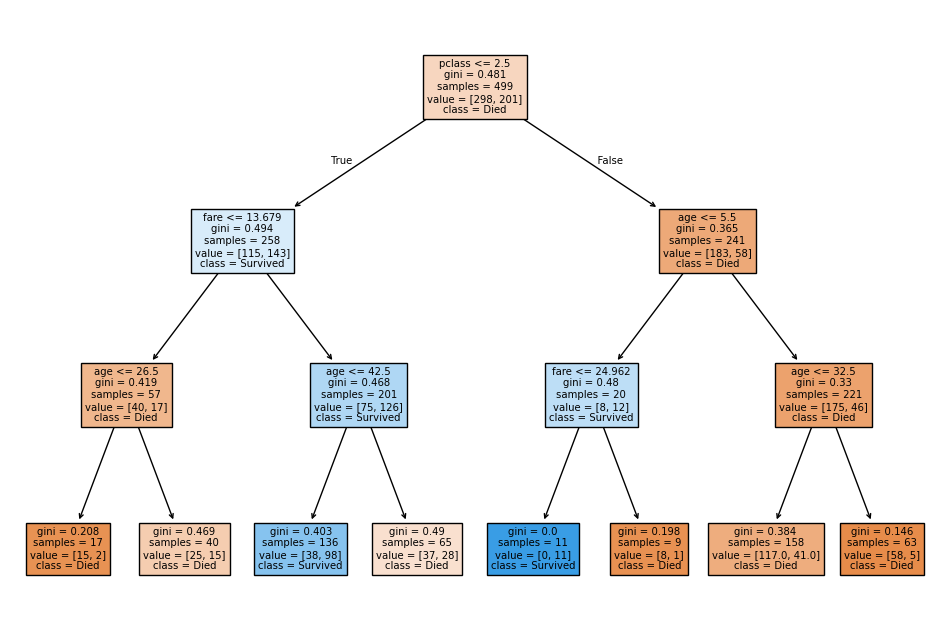

Tree Accuracy: 0.6976744186046512


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Titanic Data (using seaborn for convenience)
import seaborn as sns
titanic = sns.load_dataset('titanic').dropna(subset=['age', 'fare', 'pclass', 'survived'])
X = titanic[['age', 'fare', 'pclass']]
y = titanic['survived']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Visualize Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)
plt.show()

print("Tree Accuracy:", dt.score(X_test, y_test))


## Part 2: From Trees to Forests (Ensemble Methods)

Single decision trees are unstable. **Ensemble methods** combine multiple models to create a stronger one.

### Bagging (Bootstrap Aggregating)
1.  Create many random subsets of the training data (with replacement).
2.  Train a separate tree on each subset.
3.  Average the predictions (regression) or take a majority vote (classification).

### Random Forests
An improvement on Bagging. In addition to randomizing the data, it also **randomizes the features** considered at each split. This de-correlates the trees, making the ensemble more robust.


Random Forest Accuracy: 0.6465116279069767


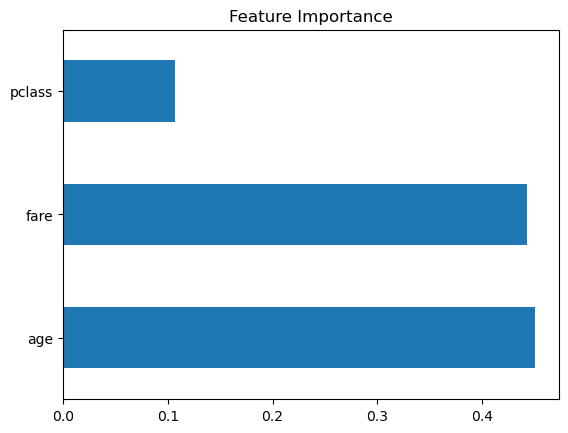

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Accuracy:", rf.score(X_test, y_test))

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.plot(kind='barh')
plt.title("Feature Importance")
plt.show()


## Exercises

### Task 1: Wine Classification
1.  Load the Wine dataset from `sklearn.datasets`.
2.  Split into training and testing sets.
3.  Train a **Decision Tree** and a **Random Forest**.
4.  Compare their accuracy.

### Task 2: Hyperparameter Tuning (Manual)
1.  Train a Random Forest on the Wine data with `n_estimators=10`.
2.  Train another with `n_estimators=200`.
3.  Does increasing the number of trees always improve accuracy?


In [3]:
# --- SOLUTION TASK 1 ---
from sklearn.datasets import load_wine
wine = load_wine()
X_w, y_w = wine.data, wine.target
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size=0.3, random_state=42)

dt_w = DecisionTreeClassifier(random_state=42)
dt_w.fit(X_train_w, y_train_w)
print(f"Decision Tree Accuracy: {dt_w.score(X_test_w, y_test_w):.4f}")

rf_w = RandomForestClassifier(random_state=42)
rf_w.fit(X_train_w, y_train_w)
print(f"Random Forest Accuracy: {rf_w.score(X_test_w, y_test_w):.4f}")

# --- SOLUTION TASK 2 ---
rf_10 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_10.fit(X_train_w, y_train_w)
print(f"RF (10 trees) Accuracy: {rf_10.score(X_test_w, y_test_w):.4f}")

rf_200 = RandomForestClassifier(n_estimators=200, random_state=42)
rf_200.fit(X_train_w, y_train_w)
print(f"RF (200 trees) Accuracy: {rf_200.score(X_test_w, y_test_w):.4f}")


Decision Tree Accuracy: 0.9630
Random Forest Accuracy: 1.0000
RF (10 trees) Accuracy: 0.9259


RF (200 trees) Accuracy: 1.0000


## Industry Best Practices

### Hyperparameter Tuning
Don't guess parameters manually. Use `GridSearchCV` or `RandomizedSearchCV` to find the best combination.

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
```

### Overfitting
Random Forests are less prone to overfitting than single trees, but they can still overfit. Limit `max_depth` or increase `min_samples_leaf` to regularize the model.
